#    REGRESSION - MINI PROJECT - "Insurance Cost Prediction"

In [1]:
#importing all the necessary modules
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
# reading the given csv file and storing it in  "data"
data = pd.read_csv("insurance data.csv")

In [3]:
#list of all columns present in the data
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
#top 5 rows of  the data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.tail()
#last 5 rows of the data

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
data.describe()
#this line of code shows the mean min max values of the columns

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.nunique()
# no of unique values in each column

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [8]:
data.info()
#gives us the data type and nullcount of all the columns in the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
#there are 3 columns present with strings and finding unique values in each of the those columns

In [10]:
data['sex'].unique()
# list of each unique values in "sex" column 

array(['female', 'male'], dtype=object)

In [11]:
data['smoker'].unique()
# list of each unique values in "smoker" column 

array(['yes', 'no'], dtype=object)

In [12]:
data['region'].unique()
# list of each unique values in "region" column 

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
len(data[data.duplicated()])
# total number of duplicate values in the "data"

1

In [14]:
data[data.duplicated()]
# listing the duplicate values

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [15]:
data = data.drop_duplicates() 
#dropping the duplicate values
#this is done by  keeping the first occurence and deleting all the next ones

In [16]:
len(data[data.duplicated()])

0

In [17]:
data.shape
#checking the shape to make sure 

(1337, 7)

In [18]:
data.isnull().values.any()
#checking for any null values present
#returns a boolean
#False - if threre are no null values present
#True and the row - if there are any present

False

In [19]:
data.smoker.replace(('yes', 'no'), (1, 0), inplace=True)
data.sex.replace(('male', 'female'), (1, 0), inplace=True)
#since there are only two unique values for these two columns it is much easier to just replace one with "1" and "0" than getting dummies

In [20]:
data = pd.get_dummies(data)
# getting dummies for the "region"

In [21]:
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   sex               1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northeast  1337 non-null   uint8  
 7   region_northwest  1337 non-null   uint8  
 8   region_southeast  1337 non-null   uint8  
 9   region_southwest  1337 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 78.3 KB


In [23]:
data.columns
#gives us the list of columns present in the dataset

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [24]:
data.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.298308,0.001868,0.001495,-0.012311,0.009415
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.058044,-0.002008,-0.012482,0.017578,-0.003767
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.198401,-0.138178,-0.136138,0.270057,-0.006211
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.067389,-0.023202,0.026044,-0.023492,0.021538
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,0.787234,0.002597,-0.036321,0.068282,-0.037168
charges,0.298308,0.058044,0.198401,0.067389,0.787234,1.000000,0.005945,-0.038695,0.073578,-0.043637
region_northeast,0.001868,-0.002008,-0.138178,-0.023202,0.002597,0.005945,1.000000,-0.319842,-0.345909,-0.320493
region_northwest,0.001495,-0.012482,-0.136138,0.026044,-0.036321,-0.038695,-0.319842,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,0.017578,0.270057,-0.023492,0.068282,0.073578,-0.345909,-0.345909,1.000000,-0.346614
region_southwest,0.009415,-0.003767,-0.006211,0.021538,-0.037168,-0.043637,-0.320493,-0.320493,-0.346614,1.000000


Plotting the histograms for all the variables

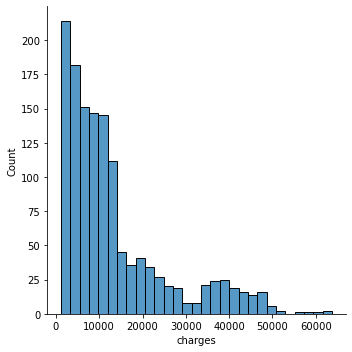

In [25]:
sns.displot(data, x="charges")

Most of the data is situated in the range of 0 - 15000 usd

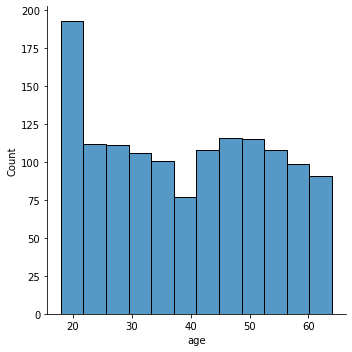

In [26]:
sns.displot(data, x="age")

the data is almost evenly distributed along the mean where as highly concentrated in the range of 20-25 when compared with others 

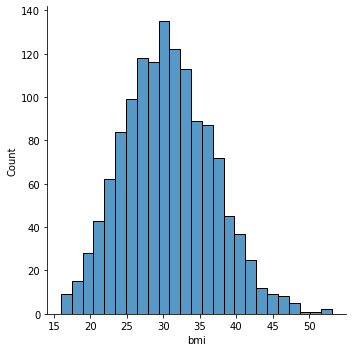

In [27]:
sns.displot(data, x="bmi")

data is distributed normally with mean of bmi as 30.6889

 Plottng the distribution plots to may be get a sense of whole column

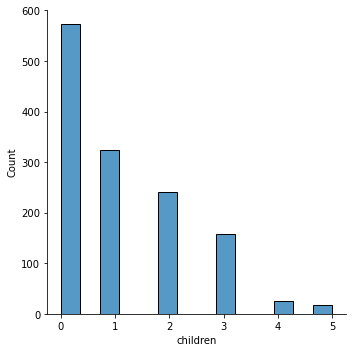

In [28]:
sns.displot(data, x="children")

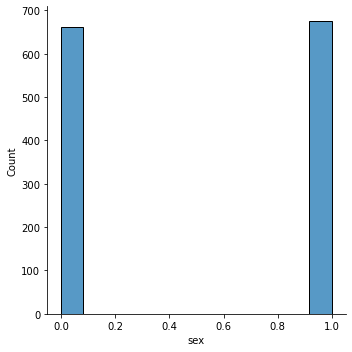

In [29]:
sns.displot(data, x="sex")

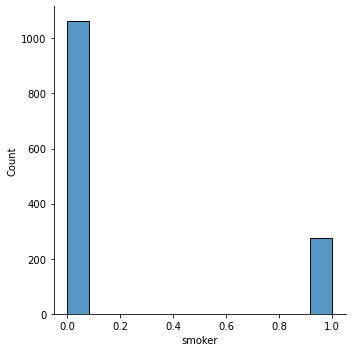

In [30]:
sns.displot(data, x="smoker")

<AxesSubplot:xlabel='age', ylabel='charges'>

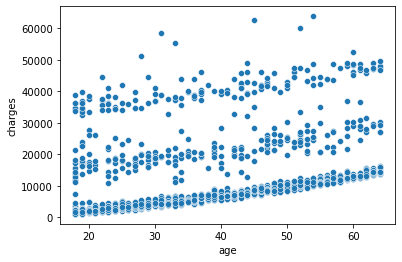

In [31]:
sns.scatterplot(data=data, x="age", y="charges")

 Here we see that as Age goes up Charges for health insurance also trends up

<AxesSubplot:xlabel='bmi', ylabel='charges'>

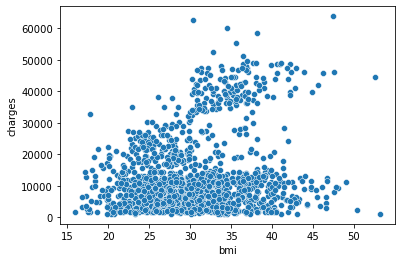

In [32]:
sns.scatterplot(data=data, x="bmi", y="charges")

plotting the box plots to see how the data is distributed for diff unique values of  the column sex

<AxesSubplot:xlabel='sex', ylabel='charges'>

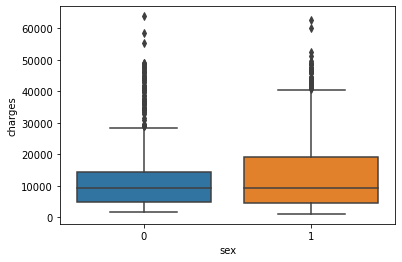

In [33]:
sns.boxplot(x="sex", y="charges", data=data)

plotting the box plots to see how the data is distributed for diff unique values of  the column smoker

<AxesSubplot:xlabel='smoker', ylabel='charges'>

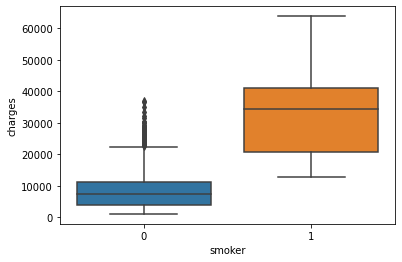

In [34]:
sns.boxplot(x="smoker", y="charges", data=data)

 plotting the box plots to see how the data is distributed for diff unique values of  the column children

<AxesSubplot:xlabel='children', ylabel='charges'>

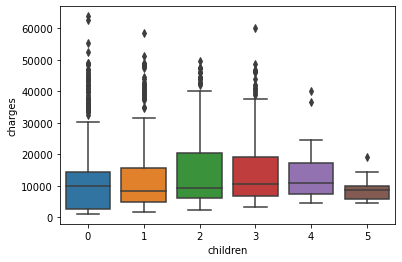

In [35]:
sns.boxplot(x="children", y="charges", data=data)

In [36]:
corelation = data.corr()
corelation

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.298308,0.001868,0.001495,-0.012311,0.009415
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.058044,-0.002008,-0.012482,0.017578,-0.003767
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.198401,-0.138178,-0.136138,0.270057,-0.006211
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.067389,-0.023202,0.026044,-0.023492,0.021538
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,0.787234,0.002597,-0.036321,0.068282,-0.037168
charges,0.298308,0.058044,0.198401,0.067389,0.787234,1.000000,0.005945,-0.038695,0.073578,-0.043637
region_northeast,0.001868,-0.002008,-0.138178,-0.023202,0.002597,0.005945,1.000000,-0.319842,-0.345909,-0.320493
region_northwest,0.001495,-0.012482,-0.136138,0.026044,-0.036321,-0.038695,-0.319842,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,0.017578,0.270057,-0.023492,0.068282,0.073578,-0.345909,-0.345909,1.000000,-0.346614
region_southwest,0.009415,-0.003767,-0.006211,0.021538,-0.037168,-0.043637,-0.320493,-0.320493,-0.346614,1.000000


columns related to region is dropped cause it has a low correaltions with the charges 

In [37]:
data_0 = data.drop(['region_northeast', 'region_northwest', 'region_southeast','region_southwest'],axis =1)

In [38]:
data_0.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [39]:
data_0.shape

(1337, 6)

In [40]:
from scipy import stats
z = np.array(stats.zscore(data_0))
print(z)
#calculating the z score to check for outliers

[[-1.44041773 -1.00977099 -0.45315959 -0.90923416  1.96966039  0.2978567 ]
 [-1.51164747  0.99032355  0.50942165 -0.07944162 -0.50770174 -0.9543806 ]
 [-0.79935006  0.99032355  0.3831546   1.58014347 -0.50770174 -0.72937251]
 ...
 [-1.51164747 -1.00977099  1.01448983 -0.90923416 -0.50770174 -0.96228744]
 [-1.29795825 -1.00977099 -0.79752426 -0.90923416 -0.50770174 -0.9310536 ]
 [ 1.55123139 -1.00977099 -0.26129928 -0.90923416  1.96966039  1.31029752]]


In [41]:
threshold = 3
print(np.where(z > 3))
#if we consider the threshold to be 3 then all values with zscore more than 3 are considered as outliers

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        639,  818,  846,  876,  931,  936,  968,  983, 1046, 1084, 1115,
       1129, 1145, 1229, 1244, 1271, 1299, 1316], dtype=int64), array([3, 5, 3, 2, 3, 3, 3, 3, 5, 3, 5, 3, 5, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 5, 5, 3, 3, 5, 2], dtype=int64))


In [42]:
data_0 = data_0[(z < 3).all(axis=1)]
#removing all the outliers from the data

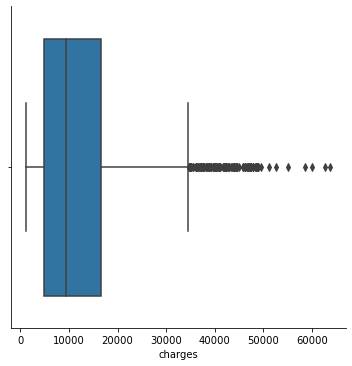

In [43]:
sns.catplot(x = 'charges', kind = 'box', data = data)
#plotting to see data before removing outliers

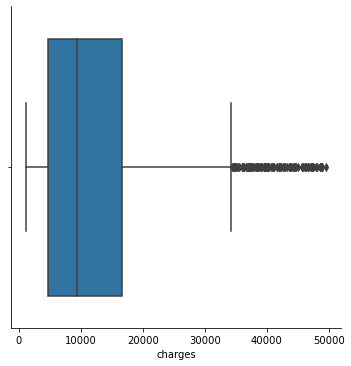

In [44]:
sns.catplot(x = 'charges', kind = 'box', data = data_0)
#plotting to see data after removing outliers


check the x axis to see the difference between values

In [45]:
data_0.shape

(1308, 6)

This finalized data is used for algorithms. A copy of the data is made for each algorithms to make sure the data is different copies of the orginal data

Plotting all different graphs

In [46]:
#plotting the probabilites plot

((array([-3.27421028, -3.01474991, -2.87032217, ...,  2.87032217,
          3.01474991,  3.27421028]),
  array([ 1121.8739 ,  1131.5066 ,  1135.9407 , ..., 48885.13561,
         48970.2476 , 49577.6624 ])),
 (10651.290495234864, 13098.376136497707, 0.905744394450527))

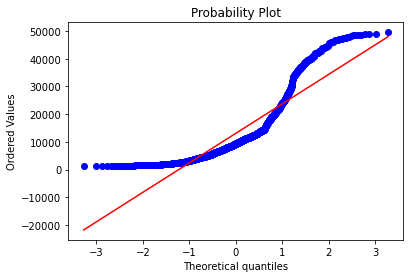

In [47]:
p = data_0['charges']
stats.probplot(p, plot=plt)

((array([-3.27421028, -3.01474991, -2.87032217, ...,  2.87032217,
          3.01474991,  3.27421028]),
  array([18, 18, 18, ..., 64, 64, 64], dtype=int64)),
 (13.718060955145287, 39.277522935779814, 0.9725531078599214))

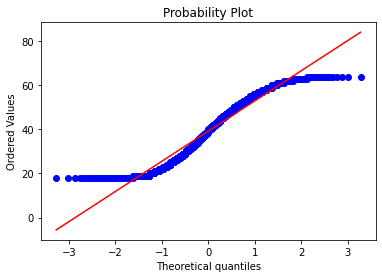

In [48]:
p = data_0['age']
stats.probplot(p, plot=plt)

((array([-3.27421028, -3.01474991, -2.87032217, ...,  2.87032217,
          3.01474991,  3.27421028]),
  array([15.96 , 16.815, 16.815, ..., 47.6  , 47.74 , 48.07 ])),
 (5.975560644797243, 30.584032874617737, 0.9978450634876364))

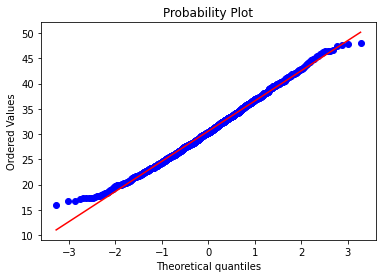

In [49]:
p = data_0['bmi']
stats.probplot(p, plot=plt)

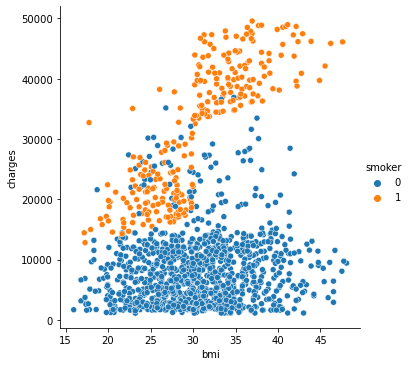

In [50]:
sns.relplot(x = 'bmi', y = 'charges', hue='smoker' ,data = data_0)

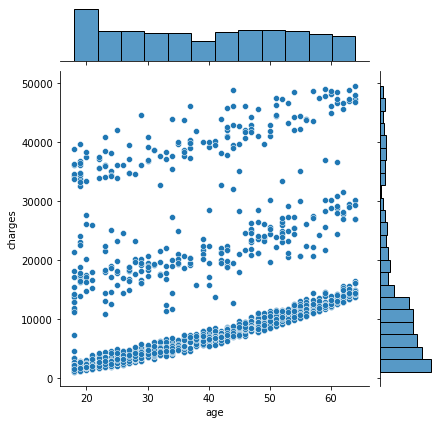

In [51]:
sns.jointplot(x=data_0['age'],y=data_0['charges'])

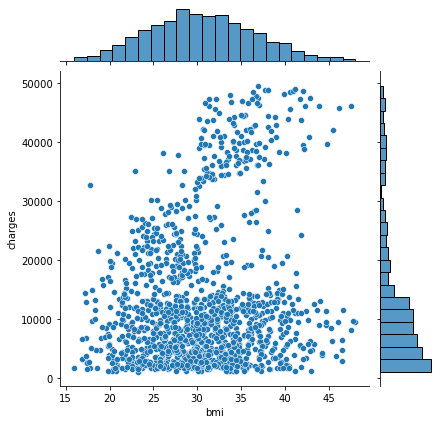

In [52]:
sns.jointplot(x=data_0['bmi'],y=data_0['charges'])

<AxesSubplot:>

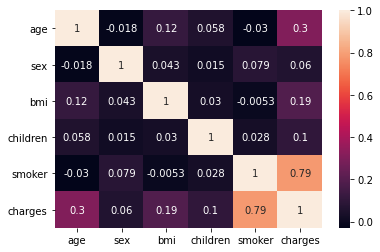

In [53]:
corelation = data_0.corr()
sns.heatmap(corelation,xticklabels = corelation.columns,yticklabels= corelation.columns,annot = True)
#finally plotting the heat map to see correlation in the finalised data


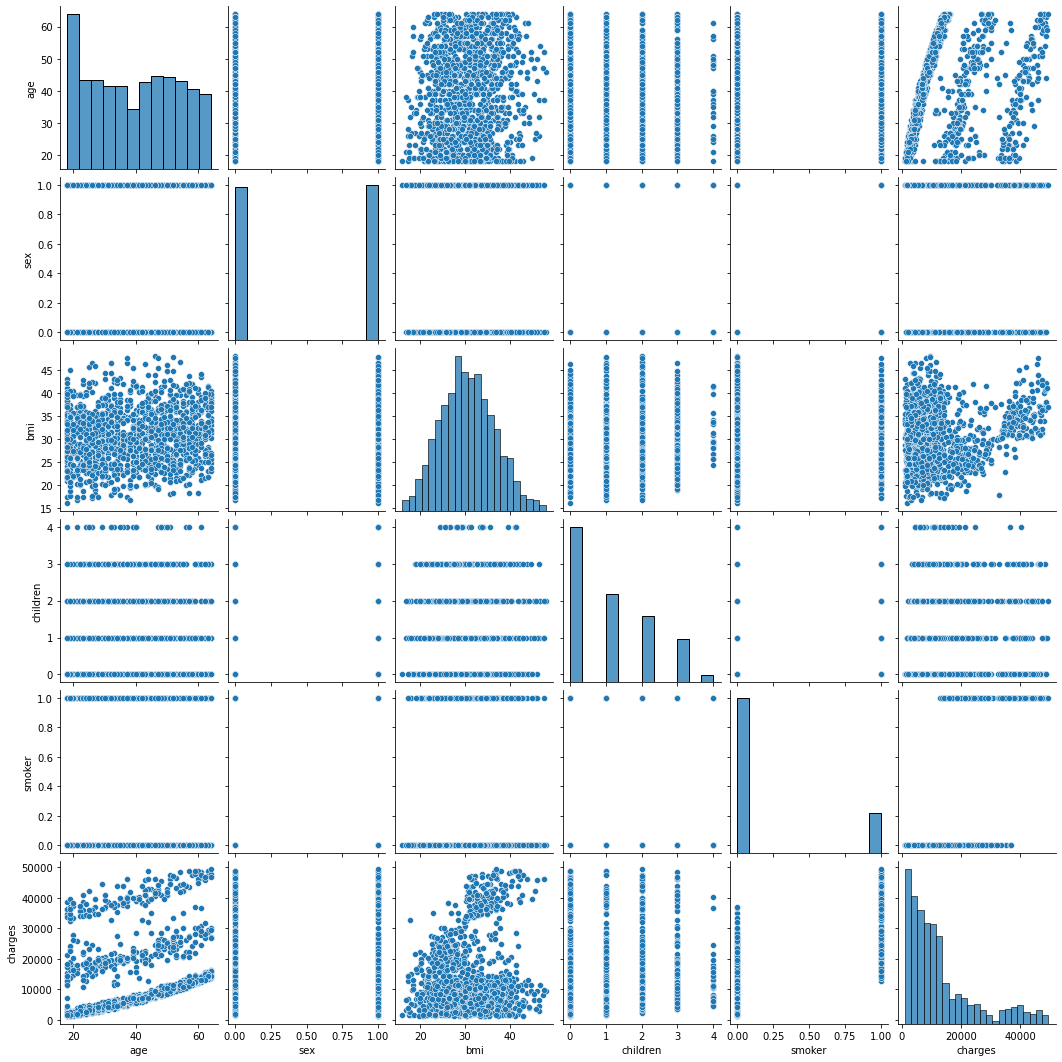

In [54]:
sns.pairplot(data_0)

## 1. SKLEARN STOCHASTIC GRADIENT DESCENT

In [55]:
#saving all the data in "data_1" that can be used for this algorithm
data_1 = data_0

In [56]:
data_1.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [57]:
data_1.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.018180,0.118272,0.058142,-0.029671,0.304541
sex,-0.018180,1.000000,0.042514,0.014774,0.079479,0.060242
bmi,0.118272,0.042514,1.000000,0.029927,-0.005289,0.191523
children,0.058142,0.014774,0.029927,1.000000,0.028498,0.099814
smoker,-0.029671,0.079479,-0.005289,0.028498,1.000000,0.785115
charges,0.304541,0.060242,0.191523,0.099814,0.785115,1.000000


In [58]:
X = data_1.iloc[:,:-1].values
#saving all the columns except the last one in X
Y = data_1.iloc[:,1].values
#saving the last column in Y(dependent variable)

In [59]:
print(X.shape)
print(Y.shape)

(1308, 5)
(1308,)


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
#importing train_test_split for splitting the data into train data and test data
#importing SGD model

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.4, random_state =0)
#splitting the data

In [62]:
SGDReg =SGDRegressor(max_iter = 10000,penalty = "elasticnet",loss = 'huber',tol = 1e-3, average = True)
#creating the model and calling it SGDReg

In [63]:
SGDReg.fit(X_train, Y_train)
#Fitting the training data to the model

SGDRegressor(average=True, loss='huber', max_iter=10000, penalty='elasticnet')

In [64]:
#using the test data set to predict the charges
Y_predict = SGDReg.predict(X_test)

In [65]:
# Coefficient and the intercept obtained from this alogrithm
print('Coefficient = ', SGDReg.coef_)
print('Intercept = ',SGDReg.intercept_)

Coefficient =  [-4.39662703e-04  5.28872695e-01  6.44208217e-03  4.01861796e-03
  2.00980207e-02]
Intercept =  [0.0150616]


In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#calculating MSE,MAE, R2 ERROR, RMSE for this algorithm
#this is done by comparing the predicted Y to the test Y which is given already along with the data
print("Mean squared error = %.5f" %mean_squared_error(Y_test,Y_predict))

print("Mean absolute error = %.5f" %mean_absolute_error(Y_test,Y_predict))

print("Root mean squared error = %.5f" %np.sqrt(mean_squared_error(Y_test,Y_predict)))  

Mean squared error = 0.05773
Mean absolute error = 0.23479
Root mean squared error = 0.24028


In [67]:
print("R2 error = %.5f" %r2_score(Y_test,Y_predict))
#calcuating the R2 score 
#R2 score ranges from 0 ----> 1 
#the more it is closer to one the better the model is

R2 error = 0.76872


## 2. SKLEARN LINEAR REGRESSION MODEL

In [68]:
#saving all the data in "data_2" that can be used for this algorithm
data_2 = data_0

In [69]:
data_2.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [70]:
X = data_2[['age', 'sex','bmi', 'children', 'smoker']]
#saving these columsn in X
Y = data_2['charges']
#saving the last column in Y(dependent variable)

In [71]:
print(X.shape)
print(Y.shape)

(1308, 5)
(1308,)


In [72]:
X

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#importing train_test_split for splitting the data into train data and test data
#importing LR model

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =1/3, random_state =0)
#splitting the data

In [75]:
model = LinearRegression()
#creating the model and calling it model

In [77]:
#Fitting the training data to the model
model.fit(X_train, Y_train)

LinearRegression()

In [78]:
Y_predict = model.predict(X_test)
#using the test data set to predict the charges

In [79]:
print('Coefficient = ', model.coef_)
print('Intercept = ',model.intercept_)
# Coefficient and the intercept obtained from this alogrithm

Coefficient =  [  251.32535317   189.90218377   296.68531842   521.97282816
 23121.96093373]
Intercept =  -11137.83798333243


In [80]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the inbuilt error finding algos
#calculating MSE,MAE, RMSE for this algorithm
#this is done by comparing the predicted Y to the test Y which is given already along with the data
print("Mean squared error = %.5f" %mean_squared_error(Y_test,Y_predict))

print("Mean absolute error = %.5f" %mean_absolute_error(Y_test,Y_predict))

print("Root mean squared error = %.5f" %np.sqrt(mean_squared_error(Y_test,Y_predict)))  

Mean squared error = 33451875.24388
Mean absolute error = 4121.60441
Root mean squared error = 5783.75961


In [81]:
print("R2 error = %.5f" %r2_score(Y_test,Y_predict))
#calcuating the R2 score 
#R2 score ranges from 0 ----> 1 
#the more it is closer to one the better the model is

R2 error = 0.77537


## 3. GRADIENT DESCENT ALGO FROM SCRATCH

In [82]:
data_3 = data_0
#saving all the data in "data_3" that can be used for this algorithm

In [83]:
data_3.shape

(1308, 6)

In [84]:
data_3.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [85]:
data_3.tail()

,age,sex,bmi,children,smoker,charges
1333,50,1,30.97,3,0,10600.5483
1334,18,0,31.92,0,0,2205.9808
1335,18,0,36.85,0,0,1629.8335
1336,21,0,25.80,0,0,2007.9450
1337,61,0,29.07,0,1,29141.3603


In [86]:
data_3.isnull().values.any()
#checking for any null values

False

In [87]:
X = data_3[['age', 'sex','bmi', 'children', 'smoker']]
#saving these columsn in X
Y = data_3['charges']
#saving the last column in Y(dependent variable)

In [88]:
Y = Y.to_numpy()
#converting it into an numpy array

In [89]:
X = X.to_numpy()
#converting X into a numpy array too

In [90]:
X

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  0.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  0.  ],
       [61.  ,  0.  , 29.07,  0.  ,  1.  ]])

In [91]:
Y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [92]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
#scaling the input so that all the columns come to a range between -1 to +1

appending a column with all ones at the starting so that the intercept can also be added to the matrix ie, x0 = 1

 y = bx0 + w1x1 + w2x2 + w3x3.......

so theta can be written as  theta = [b,w1,w2,w3,....]

and input matrix can be written as x = [x0,x1,x2,x3,.........]

In [93]:
print(X)
#input matrix before appending

[[-1.44075415 -1.00459773 -0.44918647 -0.93027909  1.98389744]
 [-1.51180593  0.99542332  0.5331877  -0.04080171 -0.50405831]
 [-0.80128811  0.99542332  0.40432431  1.73815304 -0.50405831]
 ...
 [-1.51180593 -1.00459773  1.04864127 -0.93027909 -0.50405831]
 [-1.29865058 -1.00459773 -0.80063208 -0.93027909 -0.50405831]
 [ 1.54342071 -1.00459773 -0.25338105 -0.93027909  1.98389744]]


In [94]:
a = np.ones((X.shape[0],1))
#creating a np array of size (total rows in input matrix ,1)

In [95]:
Xa = np.append(a,X,axis = 1)
#appending a column with all ones so that it is easier for calculations 

In [96]:
Xa
#input matrix after appending

array([[ 1.        , -1.44075415, -1.00459773, -0.44918647, -0.93027909,
         1.98389744],
       [ 1.        , -1.51180593,  0.99542332,  0.5331877 , -0.04080171,
        -0.50405831],
       [ 1.        , -0.80128811,  0.99542332,  0.40432431,  1.73815304,
        -0.50405831],
       ...,
       [ 1.        , -1.51180593, -1.00459773,  1.04864127, -0.93027909,
        -0.50405831],
       [ 1.        , -1.29865058, -1.00459773, -0.80063208, -0.93027909,
        -0.50405831],
       [ 1.        ,  1.54342071, -1.00459773, -0.25338105, -0.93027909,
         1.98389744]])

In [97]:
#writing a gradient descent algorithm from scratch
def cusgraddesc(x,y,theta,alpha,numiter):
    m = len(y)
    cost_list = []
    numiter_list = []
    #m = total no of samples
    for i in range(0,numiter):
        hypothesis =np.sum(x*theta.transpose(),axis = 1)
        #hypothesis is nothing but the predictions direclty obtained from mulitipling x and theta
        loss = np.array(hypothesis - y)
        #loss - difference between prediction and the actual
        cost = np.sum(((loss **2)/(2*m)))
        #calculating the cosst function 
        gradient = np.sum(x.transpose()*loss,axis = 1)/m
        #calculating the gradient to update the weights
        theta = theta - alpha*gradient
        #updating the weights 
    #and once the loop is done return the final theta values
        if i%10 ==0:
                #if the iterations is in tens then,
                cost_list.append(cost)
                #appending the cost and iteration num to the lists created 
                numiter_list.append(i)
    return theta,cost_list,numiter_list

In [98]:
alpha = 0.009
numIterations = 1000
theta = np.zeros(6)
#intializing the theta with all zeros
print(theta)

[0. 0. 0. 0. 0. 0.]


In [99]:
from sklearn.model_selection import train_test_split
#importing train_test_split for splitting the data into train data and test data

In [100]:
#splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(Xa, Y, test_size =0.4, random_state =0)

In [101]:
theta,cost_list,numiter_list = cusgraddesc(X_train,Y_train,theta, alpha, numIterations)
print(theta)
#obtaining theta returned from the model

[13136.22726306  3654.38328587   147.71897144  1689.01860521
   552.28345296  9331.09712748]


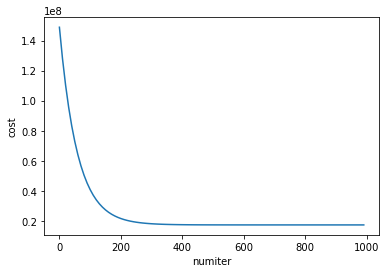

In [102]:
plt.xlabel("numiter")
plt.ylabel("cost")
plt.plot(numiter_list,cost_list)
#plotting cost vs iteration to see if the cost is decreasing or not

Cost is decreasing with the no iterations ongoing

In [103]:
Y_predict = np.sum(theta * (X_test),axis = 1)
#predicting charges on the test data from the weights trained and returned from the train data set

In [104]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
#importing the inbuilt error finding algos
#calculating MSE,MAE, RMSE for this algorithm
#this is done by comparing the predicted Y to the test Y which is given already along with the data

print("Mean squared error = %.5f" %mean_squared_error(Y_test,Y_predict))

print("Mean absolute error = %.5f" %mean_absolute_error(Y_test,Y_predict))

print("Root mean squared error = %.5f" %np.sqrt(mean_squared_error(Y_test,Y_predict)))  

Mean squared error = 33803569.63664
Mean absolute error = 4085.78142
Root mean squared error = 5814.08373


In [105]:
from sklearn.metrics import r2_score
print("R2 error = %.5f" %r2_score(Y_test,Y_predict))
#calcuating the R2 score 
#R2 score ranges from 0 ----> 1 
#the more it is closer to one the better the model is

R2 error = 0.77060


## 4. STOCHASTIC GRADIENT DESCENT ALGO FROM SCRATCH

In [106]:
data_4 = data_0

In [107]:
Y=(data_4['charges'])
#saving the last column in Y(dependent variable)
X = data_4[['age','bmi',  'smoker']]
#saving these columsn in X

In [108]:
Y = Y.to_numpy()

In [109]:
X = X.to_numpy()

In [110]:
data_3.isnull().values.any()


False

In [111]:
X

array([[19.  , 27.9 ,  1.  ],
       [18.  , 33.77,  0.  ],
       [28.  , 33.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  ],
       [21.  , 25.8 ,  0.  ],
       [61.  , 29.07,  1.  ]])

In [112]:
Y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [113]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
#scaling the input values using a inbuilt sclaer

Adding a column to the start of the input matrix so that it makes computationally easier

In [114]:
X

array([[-1.44075415, -0.44918647,  1.98389744],
       [-1.51180593,  0.5331877 , -0.50405831],
       [-0.80128811,  0.40432431, -0.50405831],
       ...,
       [-1.51180593,  1.04864127, -0.50405831],
       [-1.29865058, -0.80063208, -0.50405831],
       [ 1.54342071, -0.25338105,  1.98389744]])

In [115]:
a = np.ones((X.shape[0],1))
print(a)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [116]:
Xa = np.append(a,X,axis = 1)
Xa

array([[ 1.        , -1.44075415, -0.44918647,  1.98389744],
       [ 1.        , -1.51180593,  0.5331877 , -0.50405831],
       [ 1.        , -0.80128811,  0.40432431, -0.50405831],
       ...,
       [ 1.        , -1.51180593,  1.04864127, -0.50405831],
       [ 1.        , -1.29865058, -0.80063208, -0.50405831],
       [ 1.        ,  1.54342071, -0.25338105,  1.98389744]])

In [117]:
#writing SGD algorithm from scratch
def stocashtic_gradient_descent(X,Y,learning_rate,iterations):
    m = len(Y)
    #creating a couple empty lists to plot the cost vs iterations graph
    cost_list = []
    numiter_list = []
    theta = np.ones(4)
    #intializing theta to be ones in the shape of (total no of columns in the input data ,1)
    for it in range(iterations):
        cost =0.0
        for j in range(m):
            i = np.random.randint(0,m)
            #taking a random number 
            x = X[i,:].reshape(1,X.shape[1])
            y = Y[i].reshape(1,1)
            #reshaping the numpy array 
            prediction = np.dot(x,theta)
            #making prediction directly by multiplying the input matrix to the theta
            loss = prediction - y
            #checking the differrence between the prediction and the actual value
            theta = theta -(1/m)*learning_rate*( x.T.dot(loss))
            #updating the weights by subracting the previous theta and the gradient  
            cost += (1/2*m) * np.sum(np.square(loss))
            #updating the cost of this row to obtain the total cost of this itertaion
        if it%10 ==0:
            #if the iterations is in tens then,
            cost_list.append(cost)
            #appending the cost and iteration num to the lists created 
            numiter_list.append(it)
    return theta, cost_list,numiter_list

In [118]:
numiter = 100
alpha = 0.003

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(Xa, Y, test_size =1/3, random_state =0)

In [121]:
theta, cost_list,numiter_list = stocashtic_gradient_descent(X_train,Y_train,alpha,numiter)
theta
##taking the theta and cost and iteration num lists 

array([[3358.98387222, 3358.98387222, 3358.98387222, 3358.98387222],
       [ 797.54181929,  797.54181929,  797.54181929,  797.54181929],
       [ 530.94685501,  530.94685501,  530.94685501,  530.94685501],
       [2254.89565866, 2254.89565866, 2254.89565866, 2254.89565866]])

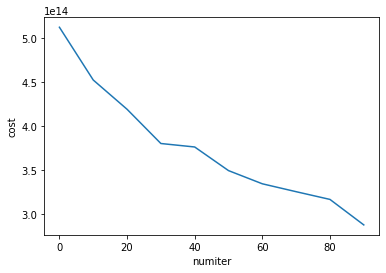

In [122]:
plt.xlabel("numiter")
plt.ylabel("cost")
plt.plot(numiter_list,cost_list)
#plotting cost vs iteration to see if the cost is decreasing or not

As the iteration increases the cost of the model starts decreasing and continues in that direction which is good

In [123]:
 Y_predict = np.sum(X_test.dot(theta ),axis = 1)

In [124]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print("Mean squared error = %.5f" %mean_squared_error(Y_test,Y_predict))

print("Mean absolute error = %.5f" %mean_absolute_error(Y_test,Y_predict))
#importing the inbuilt error finding algos
#calculating MSE,MAE, RMSE for this algorithm
#this is done by comparing the predicted Y to the test Y which is given already along with the data

print("Root mean squared error = %.5f" %np.sqrt(mean_squared_error(Y_test,Y_predict)))  

Mean squared error = 34371943.43808
Mean absolute error = 4376.03397
Root mean squared error = 5862.75903


In [125]:
from sklearn.metrics import r2_score
print("R2 error = %.5f" %r2_score(Y_test,Y_predict))
#calcuating the R2 score 
#R2 score ranges from 0 ----> 1 
#the more it is closer to one the better the model is

R2 error = 0.76919


## 5. MINI BATCH GRADIENT DESCENT ALGO FROM SCRATCH

In [126]:
data_5 = data_0

In [127]:
X = data_5[['age','bmi',  'smoker']]
Y = data_5['charges']
#saving the last column in Y(dependent variable)
#saving these columsn in X

In [128]:
from sklearn import preprocessing

In [129]:
X = preprocessing.StandardScaler().fit(X).transform(X)
#scaling the inputs to be in the similar range

In [130]:
X

array([[-1.44075415, -0.44918647,  1.98389744],
       [-1.51180593,  0.5331877 , -0.50405831],
       [-0.80128811,  0.40432431, -0.50405831],
       ...,
       [-1.51180593,  1.04864127, -0.50405831],
       [-1.29865058, -0.80063208, -0.50405831],
       [ 1.54342071, -0.25338105,  1.98389744]])

In [131]:
a = np.ones((X.shape[0],1))
a

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [132]:
Xa = np.append(a,X,axis = 1)
Xa
#adding a column for including the intercept to the matrix

array([[ 1.        , -1.44075415, -0.44918647,  1.98389744],
       [ 1.        , -1.51180593,  0.5331877 , -0.50405831],
       [ 1.        , -0.80128811,  0.40432431, -0.50405831],
       ...,
       [ 1.        , -1.51180593,  1.04864127, -0.50405831],
       [ 1.        , -1.29865058, -0.80063208, -0.50405831],
       [ 1.        ,  1.54342071, -0.25338105,  1.98389744]])

In [133]:
def minibatch_gradient_descent(X,Y,theta,learning_rate,iterations,batch_size ):

    m = len(Y)
    cost_list =[]
    numiter_list = []

    for it in range(iterations):
        cost =0.0
        #based on the given batch_size taking samples of that batch_size at a time
        for i in range(0,m,batch_size):
            x = np.array(X[i:i+batch_size]) # this creates a numpy array taking samples from "X" from the iteration number to iterationnumber + batch size
            y = np.array(Y[i:i+batch_size]) # this creates a numpy array taking samples from "Y" from the iteration number to iterationnumber + batch size
            #and the rest is just like the gradient descent
            #where you calculate the gradient and subtract it from the previous theta to obtain the new theta until the end of iterations
            prediction = np.dot(x,theta)
            loss =  prediction - y
            gradient =np.sum(x.transpose() * loss,axis = 1)/m
            theta = theta -learning_rate * gradient
            cost += (1/2*m) * np.sum(np.square(loss))
        if it%100 ==0:
            cost_list.append(cost)
            numiter_list.append(it)
        
    return theta, cost_list,numiter_list

In [134]:
learning_rate =0.0055
iterations = 1000
batch_size = 20
theta = np.ones(4)
#intizalizing the weights to be all ones
print(theta)

[1. 1. 1. 1.]


In [135]:
from sklearn.model_selection import train_test_split
#importing the algo for splitting the  data into test and train data

In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(Xa, Y, test_size =1/3, random_state =0)
#splitting the data into test and train

In [137]:
theta_train, cost_list,numiter_list = minibatch_gradient_descent(X_train,Y_train,theta,learning_rate,iterations,batch_size)
theta_train
#running the model on the train data set and saving the obtained theta values into a variable

array([13060.48070036,  3545.8595768 ,  1791.12885223,  9242.88537835])

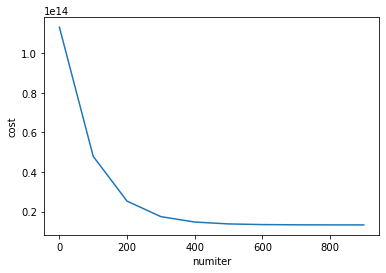

In [138]:
plt.xlabel("numiter")
plt.ylabel("cost")
plt.plot(numiter_list,cost_list)
#plotting cost vs iteration to see if the cost is decreasing or not

Here the cost is decreaing with increasing iterations which means the model is converging which is good

In [139]:
Y_predict = np.sum(theta_train * (X_test),axis = 1)
#predicting the charges from the weights obtained from the algorithm

In [140]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print("Mean squared error = %.5f" %mean_squared_error(Y_test,Y_predict))
#importing the inbuilt error finding algos
#calculating MSE,MAE, RMSE for this algorithm
#this is done by comparing the predicted Y to the test Y which is given already along with the data
print("Mean absolute error = %.5f" %mean_absolute_error(Y_test,Y_predict))

print("Root mean squared error = %.5f" %np.sqrt(mean_squared_error(Y_test,Y_predict)))  

Mean squared error = 33932906.44446
Mean absolute error = 4152.75810
Root mean squared error = 5825.19583


In [141]:
from sklearn.metrics import r2_score

In [142]:
print("R2 error = %.5f" %r2_score(Y_test,Y_predict))
#calcuating the R2 score 
#R2 score ranges from 0 ----> 1 
#the more it is closer to one the better the model is

R2 error = 0.77214


## 6. LINEAR REGRESSION USING NORMAL EQUATIONS

In [143]:
data_6 = data_0

In [144]:
X = data[['age','bmi',  'smoker']]
Y = data['charges']
#saving all the columns except the last one in X
#saving the last column in Y(dependent variable)

In [145]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [146]:
print(X)

[[-1.44041773 -0.45315959  1.96966039]
 [-1.51164747  0.50942165 -0.50770174]
 [-0.79935006  0.3831546  -0.50770174]
 ...
 [-1.51164747  1.01448983 -0.50770174]
 [-1.29795825 -0.79752426 -0.50770174]
 [ 1.55123139 -0.26129928  1.96966039]]


In [147]:
a = np.ones((X.shape[0],1))
print(a)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [148]:
Xa = np.append(a,X,axis = 1)
Xa

array([[ 1.        , -1.44041773, -0.45315959,  1.96966039],
       [ 1.        , -1.51164747,  0.50942165, -0.50770174],
       [ 1.        , -0.79935006,  0.3831546 , -0.50770174],
       ...,
       [ 1.        , -1.51164747,  1.01448983, -0.50770174],
       [ 1.        , -1.29795825, -0.79752426, -0.50770174],
       [ 1.        ,  1.55123139, -0.26129928,  1.96966039]])

In [149]:
def custnormal(X,Y):
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
    return theta

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, Y_train, Y_test = train_test_split(Xa, Y, test_size =0.8, random_state =0)

In [152]:
theta = custnormal(X_train,Y_train)
theta

array([13271.83332566,  2948.21896775,  2053.98616265, 10042.35163825])

In [153]:
Y_predict = np.dot(X_test,theta)
#predicting the charges from the weights obtained from the algorithm

In [154]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
#importing the inbuilt error finding algos
#calculating MSE,MAE, RMSE for this algorithm
#this is done by comparing the predicted Y to the test Y which is given already along with the data

print("Mean squared error = %.5f" %mean_squared_error(Y_test,Y_predict))

print("Mean absolute error = %.5f" %mean_absolute_error(Y_test,Y_predict))

print("Root mean squared error = %.5f" %np.sqrt(mean_squared_error(Y_test,Y_predict)))  

Mean squared error = 37983840.49852
Mean absolute error = 4229.31831
Root mean squared error = 6163.10315


In [155]:
from sklearn.metrics import r2_score

In [156]:
print("R2 error = %.5f" %r2_score(Y_test,Y_predict))
#calcuating the R2 score 
#R2 score ranges from 0 ----> 1 
#the more it is closer to one the better the model is

R2 error = 0.73541
